# Housing Maintenance Violation Code Analysis
 By Amy Chen

__This is an analysis of the data reported by the Department of Housing Preservation and Development (HPD). HPD issues violations to rental dwelling units that have violated either Housing Maintenance Code or the New York State Multiple Dwelling Law. Violations are closed when violations are corrected upon reinspection. __



In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

<B> Here is a look at the housing violation data. As of when the file was downloaded, there are 4,955,054 housing violations and the dataset is continuously getting updated. We will take a sample of that dataset and work with that data

In [ ]:
#housing = pd.read_csv('Housing_Maintenance_Code_Violations.csv')
housing = pd.read_csv('sample_housing.csv')

/Users/amychen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sample = housing.sample(frac=0.9)
sample.to_csv('sample_housing.csv')

In [6]:
housing.columns

Index(['ViolationID', 'BuildingID', 'RegistrationID', 'BoroID', 'Borough',
       'HouseNumber', 'LowHouseNumber', 'HighHouseNumber', 'StreetName',
       'StreetCode', 'Postcode', 'Apartment', 'Story', 'Block', 'Lot', 'Class',
       'InspectionDate', 'ApprovedDate', 'OriginalCertifyByDate',
       'OriginalCorrectByDate', 'NewCertifyByDate', 'NewCorrectByDate',
       'CertifiedDate', 'OrderNumber', 'NOVID', 'NOVDescription',
       'NOVIssuedDate', 'CurrentStatusID', 'CurrentStatus',
       'CurrentStatusDate', 'NovType', 'ViolationStatus', 'Latitude',
       'Longitude', 'CommunityBoard', 'CouncilDistrict', 'CensusTract', 'BIN',
       'BBL', 'NTA'],
      dtype='object')

In [7]:
housing

ViolationID  BuildingID  RegistrationID  BoroID        Borough  \
0           10000009      265980          301467       3       BROOKLYN   
1           10000011       73852          226626       2          BRONX   
2           10000012       80102          211704       2          BRONX   
3           10000014      268639          350942       3       BROOKLYN   
4           10000017      268167          300713       3       BROOKLYN   
5           10000019      268443          314037       3       BROOKLYN   
6           10000022      265980          301467       3       BROOKLYN   
7           10000024       97795          220733       2          BRONX   
8           10000026       97799          210701       2          BRONX   
9           10000029      220506          325404       3       BROOKLYN   
10          10000035      265980          301467       3       BROOKLYN   
11          10000084      306728          357205       3       BROOKLYN   
12          10000036      220512          331531       3       BROOKLYN   
13          10000040       95815          210942       2          BRONX   
14          10000050       92689          204906       2          BRONX   
15          10000058      367812          363511       3       BROOKLYN   
16          10000070      349658          317925       3       BROOKLYN   
17          10000074      116656          200683       2          BRONX   
18          10000078      306728          357205       3       BROOKLYN   
19          10000082      306728          357205       3       BROOKLYN   
20          10000071      349658          317925       3       BROOKLYN   
21          10000060       65537          207907       2          BRONX   
22          10000085      306728          357205       3       BROOKLYN   
23          10000087      306728          357205       3       BROOKLYN   
24          10000088      306728          357205       3       BROOKLYN   
25          10000089      306728          357205       3       BROOKLYN   
26          10000091       28098          111925       1      MANHATTAN   
27          10000105      354272          355611       3       BROOKLYN   
28          10000112      207323          302331       3       BROOKLYN   
29          10000113      207323          302331       3       BROOKLYN   
...              ...         ...             ...     ...            ...   
4955024      9528676      814491          819042       3       BROOKLYN   
4955025      9528680      814491          819042       3       BROOKLYN   
4955026      9528702      814491          819042       3       BROOKLYN   
4955027      9528705      814491          819042       3       BROOKLYN   
4955028      9616737      354644          369041       3       BROOKLYN   
4955029      9616738      354644          369041       3       BROOKLYN   
4955030      9626806       78296          202763       2          BRONX   
4955031      9630228       78296          202763       2          BRONX   
4955032      9630234       78296          202763       2          BRONX   
4955033      9630235       78296          202763       2          BRONX   
4955034      9630236       78296          202763       2          BRONX   
4955035      9631639       78296          202763       2          BRONX   
4955036      9636462      805098          102071       1      MANHATTAN   
4955037      9670379      814482          819045       3       BROOKLYN   
4955038      9706441      814482          819045       3       BROOKLYN   
4955039      9706475      814482          819045       3       BROOKLYN   
4955040      9720903       42680          130572       1      MANHATTAN   
4955041      9733076       42680          130572       1      MANHATTAN   
4955042      9738562       42680          130572       1      MANHATTAN   
4955043      9738566       42680          130572       1      MANHATTAN   
4955044      9803302       78296          202763       2          BRONX   
4955045      9803353       78296  

__There are many dates that are being used in this dataset. We will convert the inspection date and approval date into datetime since they are currently strings. By converting them, we will create a new column called "Time Until Approval" to see how long it takes the Department of Building to approve. Within this dataset, 65% of the violations are still open. __

In [11]:
open_close = housing.groupby('ViolationStatus').count()
open_close['ViolationID'].iloc[1] / open_close['ViolationID'].iloc[0]

0.65561810168179124

In [12]:
housing['InspectionDate'] = pd.to_datetime(housing['InspectionDate'], format="%m/%d/%Y", errors = 'coerce')
housing['ApprovedDate'] = pd.to_datetime(housing['ApprovedDate'], format="%m/%d/%Y", errors = 'coerce')

/Users/amychen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/amychen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
housing['Time_Until_Approval'] = (abs(housing['ApprovedDate'] - housing['InspectionDate']))
housing['Time_Until_Approval'] = (housing['Time_Until_Approval'] / np.timedelta64(1, 'D')).fillna(0).astype(int)

/Users/amychen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/amychen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<B> We will look at data starting from the 1980s since there aren't many data points in the file for anything before then. Within the last 30-40 years, there seems to be an exponential growth in housing violations. The graph that is displayed shows the change over time in years.

In [14]:
housing_past_1960 = housing[(housing.InspectionDate > '1980-01-01')]

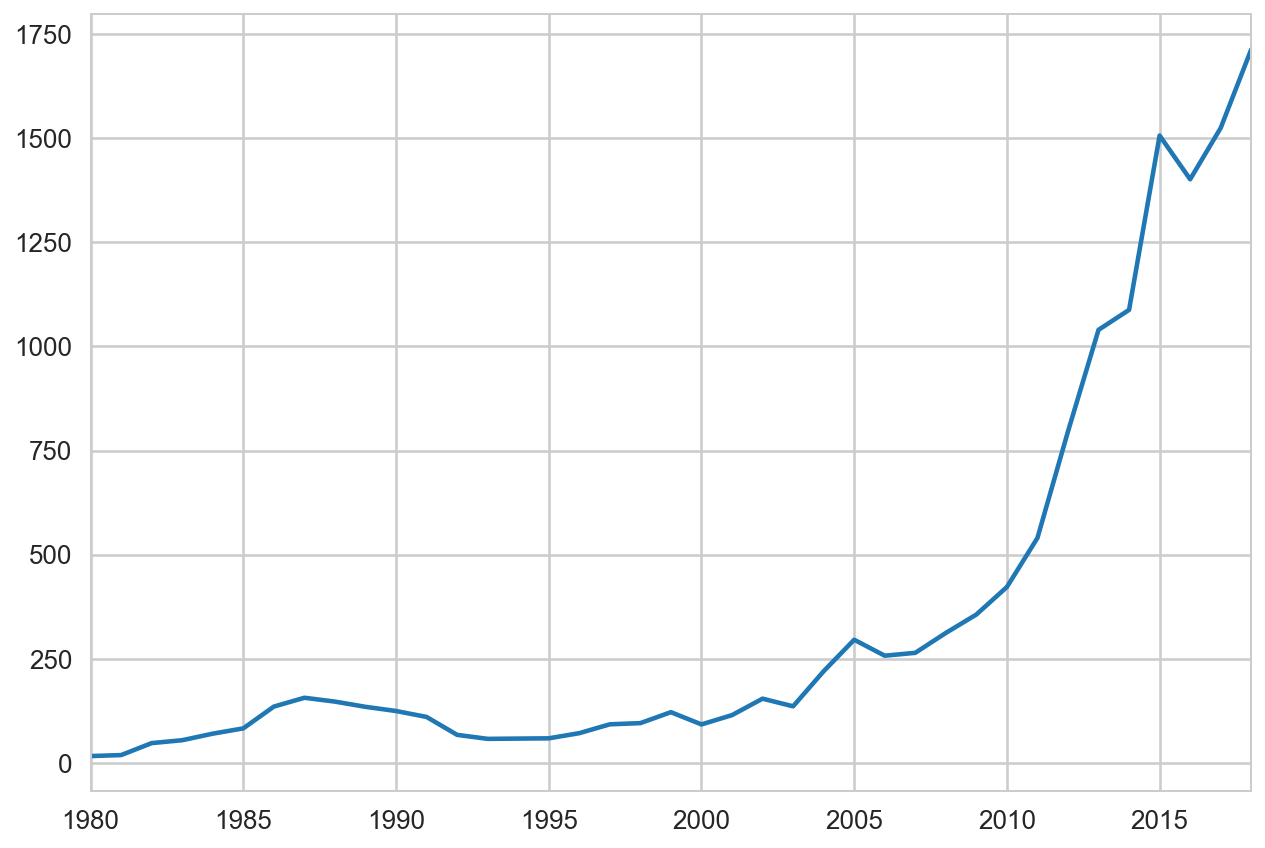

In [25]:
housing_past_1960.InspectionDate.value_counts().sort_index().resample('AS').mean().plot()

__We will now look at how many unique violations there are. The order number references to the abstract description of the violation condition which cites a specific section of the law which is in violation. From the code below, we find that there are <b>389</b> unique violation. That's 4955054:389 individual violations to violation code. 508 is the most popular order number.__

1. 508: REPAIR THE BROKEN OR DEFECTIVE PLASTERED SURFACES AND PAINT IN A UNIFORM COLOR
2. 501: REPAIR THE BROKEN OR DEFECTIVE
3. 502: PROPERLY REPAIR WITH SIMILAR MATERIAL THE BROKEN OR DEFECTIVE
4. 780: OWNER FAILED TO FILE A VALID REGISTRATION STATEMENT WITH THE DEPARTMENT AS REQUIRED BY ADM CODE §27-2097 AND IS THEREFORE SUBJECT TO CIVIL PENALTIES, PROHIBITED FROM CERTIFYING VIOLATIONS, AND DENIED THE RIGHT TO RECOVER POSSESSION OF PREMISES FOR NONPAYMENT OF RENT UNTIL A VALID REGISTRATION STATEMENT IS FILED.
5. 556: PAINT WITH LIGHT COLORED PAINT TO THE SATISFACTION OF THIS DEPARTMENT
6. 702: REPAIR OR REPLACE THE SMOKE DETECTOR
7. 510: 309 M/D LAW ABATE THE NUISANCE CONSISTING OF
8. 505: REPLACE WITH NEW THE BROKEN OR DEFECTIVE
9. 583: PROPERLY REPAIR THE SOURCE AND ABATE THE EVIDENCE OF A WATER LEAK
10. 550: TRACE AND REPAIR THE SOURCE AND ABATE THE NUISANCE CONSISTING OF MOLD ...

In [16]:
housing['OrderNumber'] = [str(order) for order in housing['OrderNumber']]
print(housing['OrderNumber'].nunique())

389


/Users/amychen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


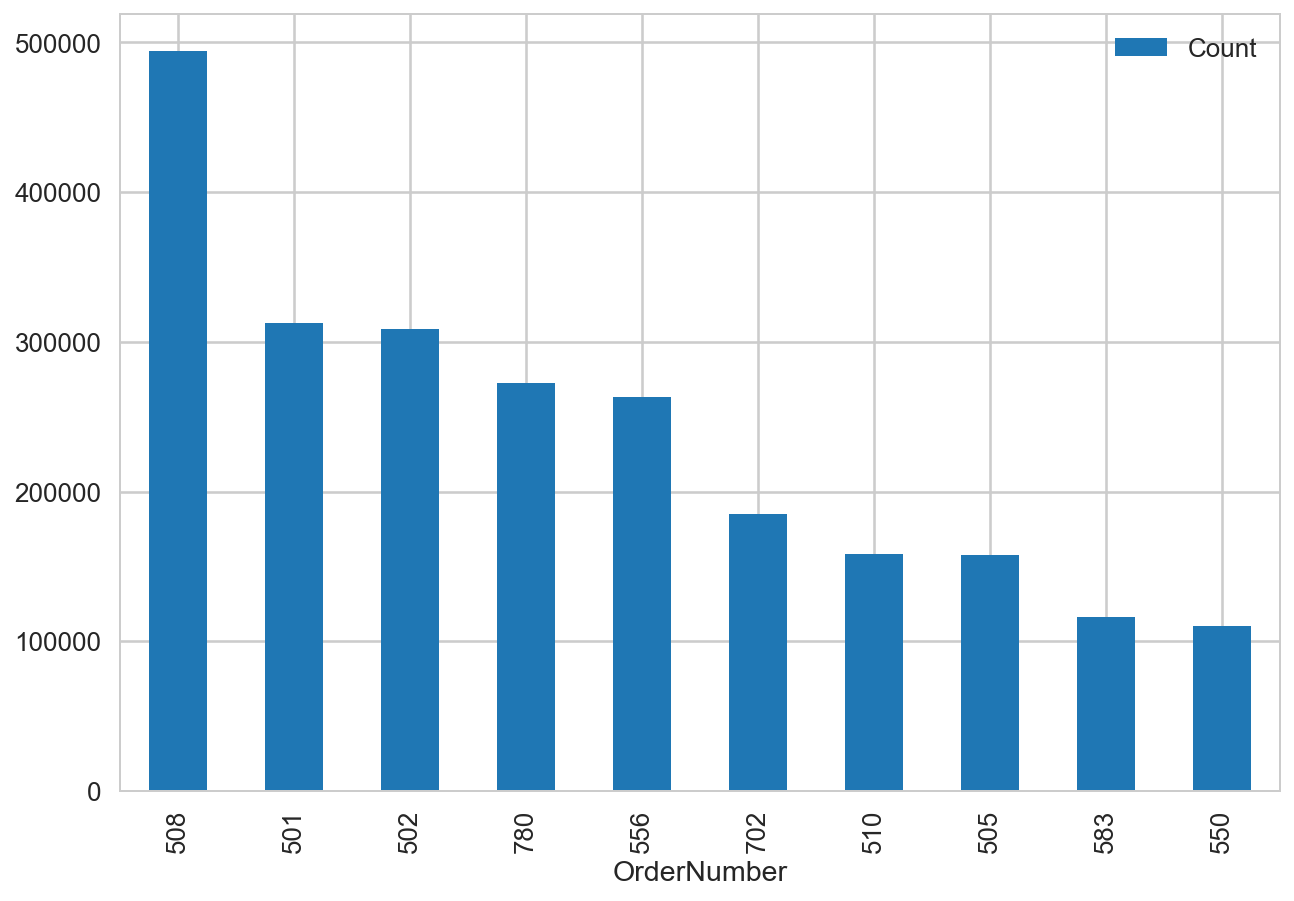

In [26]:
orderNumberViolation = housing[['ViolationID', 'OrderNumber']].groupby('OrderNumber').count().rename(columns={"ViolationID":"Count"})
orderNumberViolation.sort_values('Count', ascending=False).head(10).plot(kind='bar')

__We will now look at the number of violations in each borough. Here, Brooklyn has the most violation. The violations are also plotted on the NYC map which I got from geojson. Data without a latitude and longitude are dropped since they were causing errors. The lighter the purple, the less concentration of violation.__

In [20]:
housing = housing.dropna(subset=['Latitude', 'Longitude'])

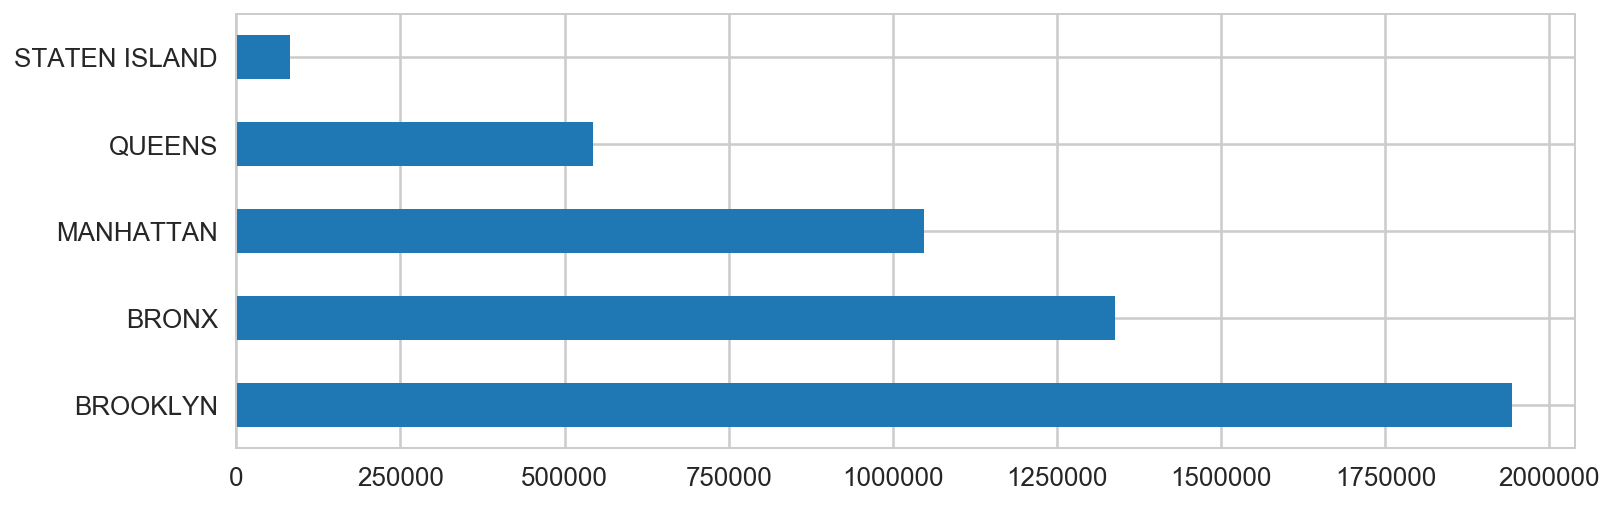

In [27]:
housing.Borough.value_counts().plot(kind='barh', figsize=(12,4))

In [18]:
!curl 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON' -o nyc-neighborhoods.geojson

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4067k    0 4067k    0     0  4067k      0 --:--:--  0:00:01 --:--:-- 2066k


In [19]:
df_nyc = gpd.GeoDataFrame.from_file('nyc-neighborhoods.geojson')

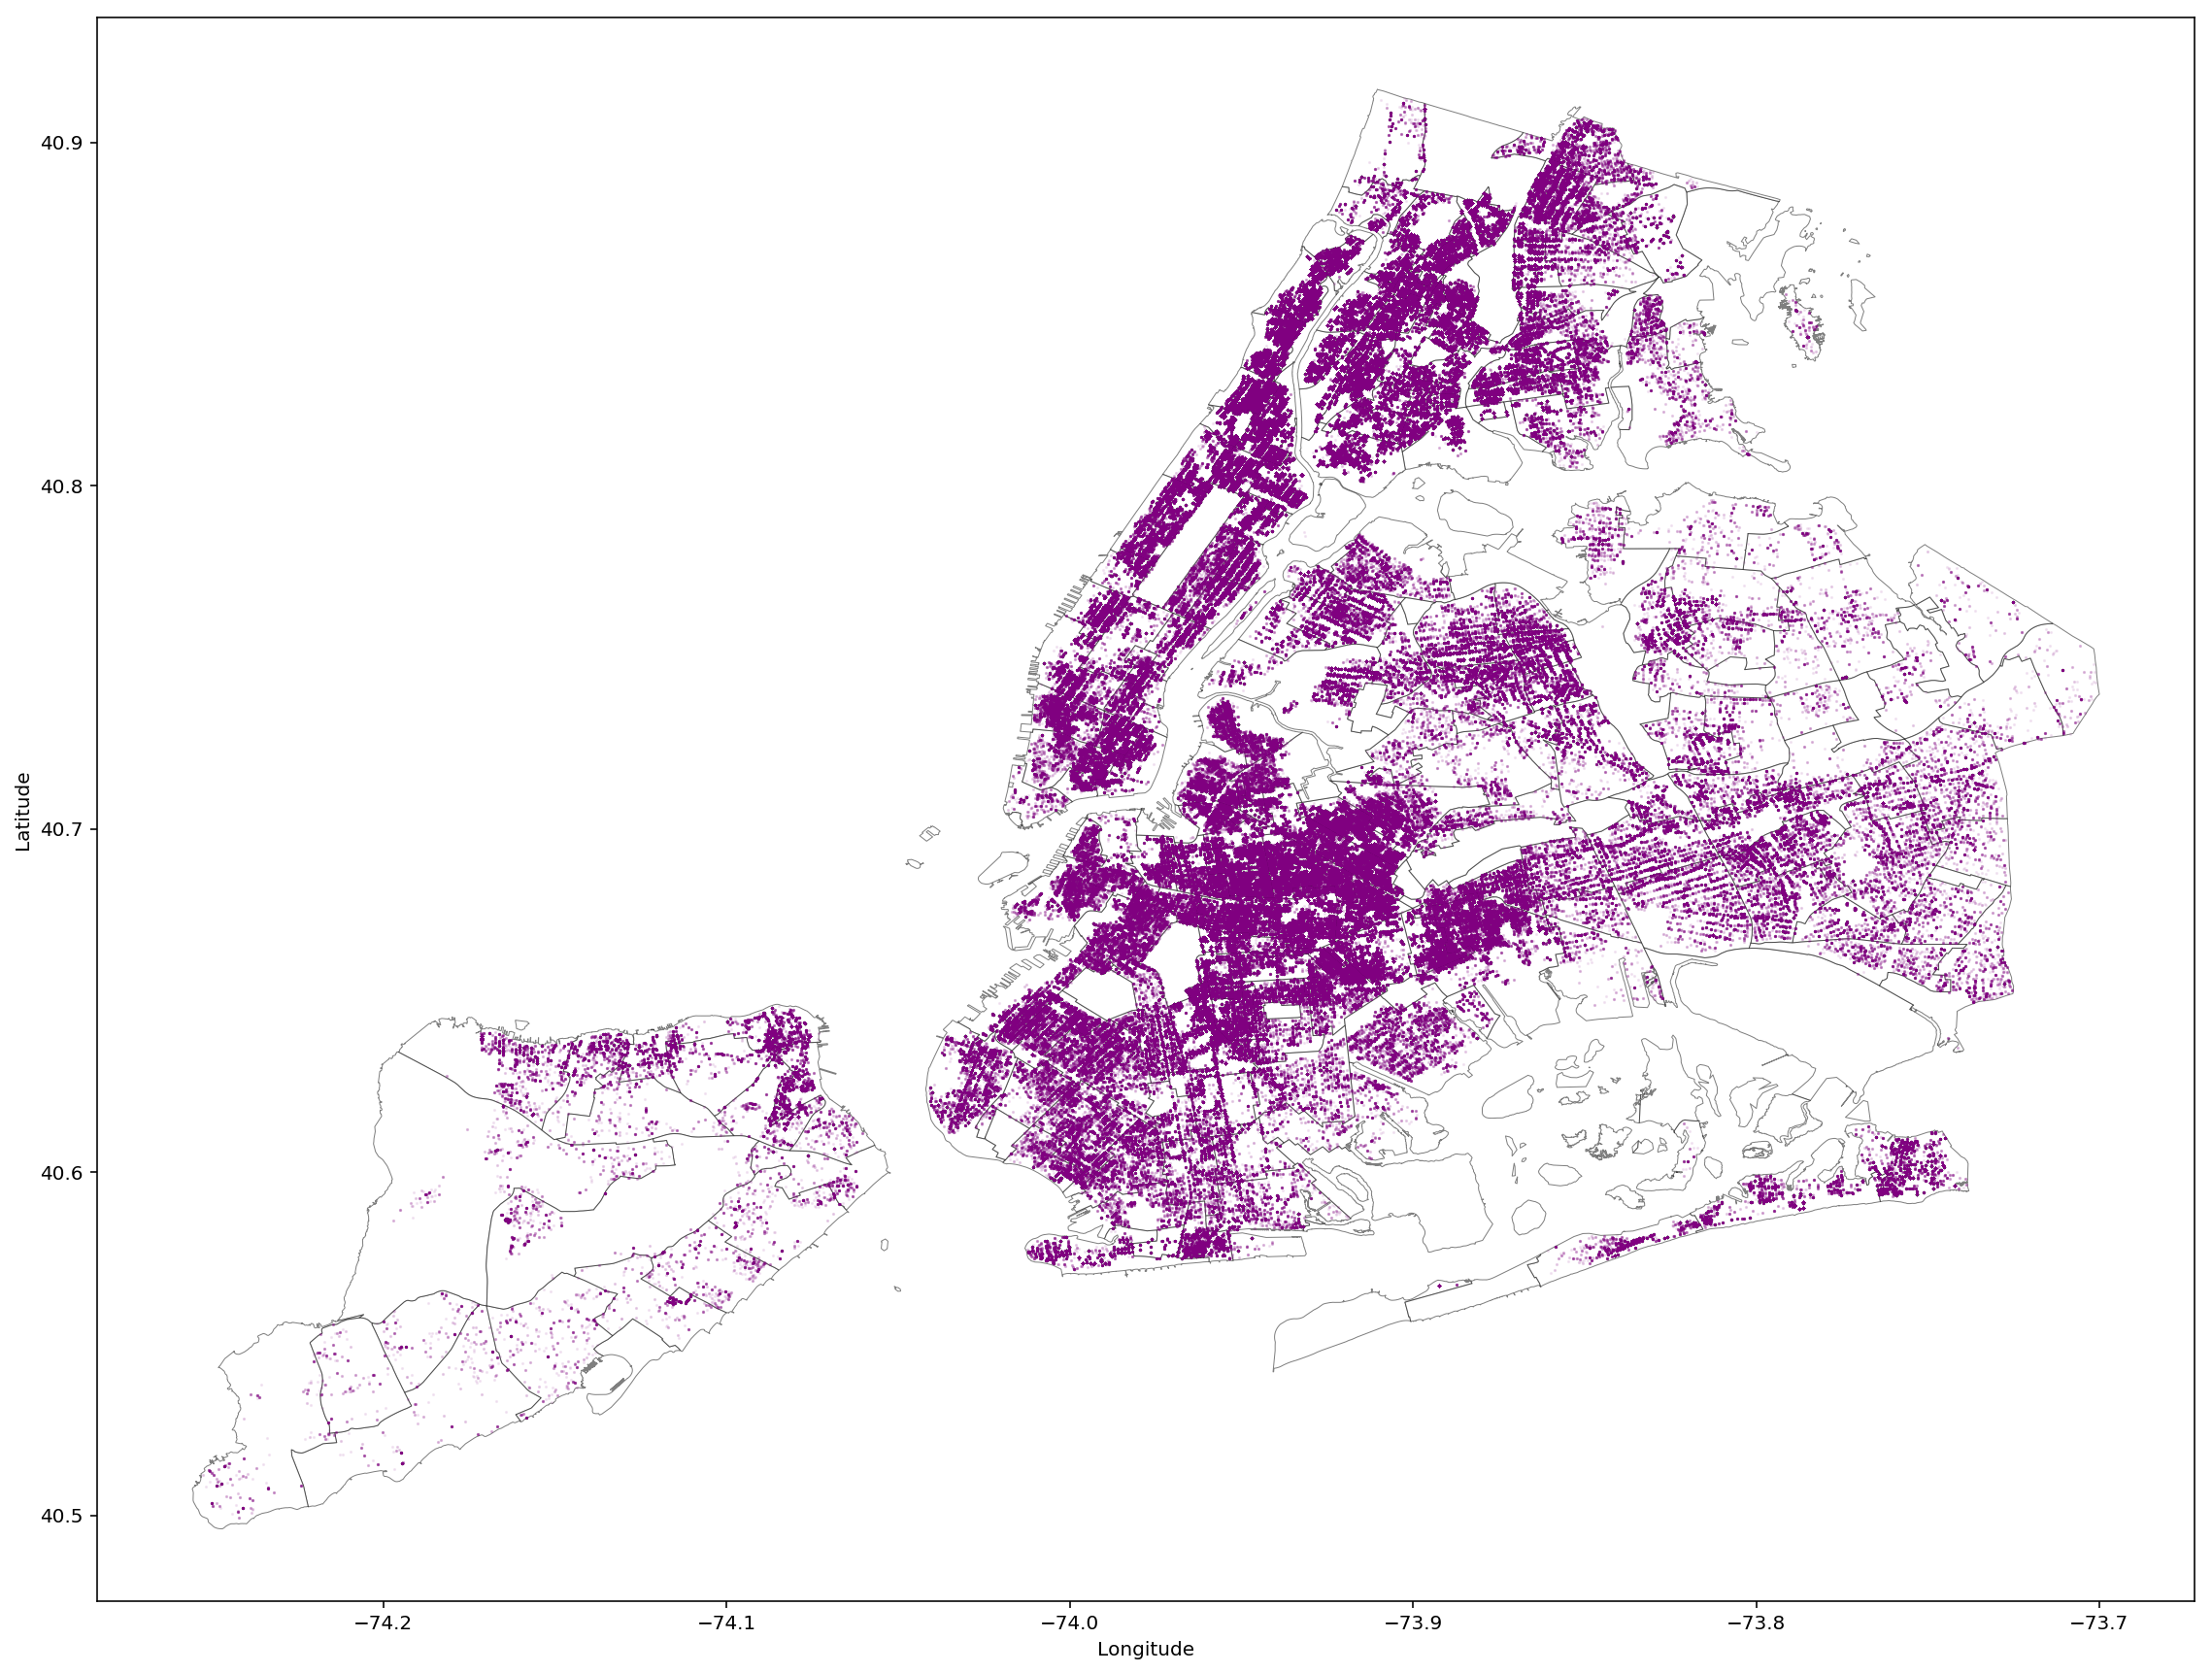

In [22]:
ny_map = df_nyc.plot(linewidth=0.5, color='White', edgecolor = 'Black', figsize = (20,15), alpha=0.5)

housing_loc = housing.sample(frac=0.7).plot.scatter(
    x="Longitude", 
    y="Latitude",
    figsize=(20,15),
    s=0.3,
    color='purple',
    alpha=0.1,
    ax=ny_map
)

__The following graph below takes 10% of the sample data and plots a KDE map from it. The map may be a bit inaccurate, but generally speaking, it should be okay because higher concentrations of violation will still be mapped out.__

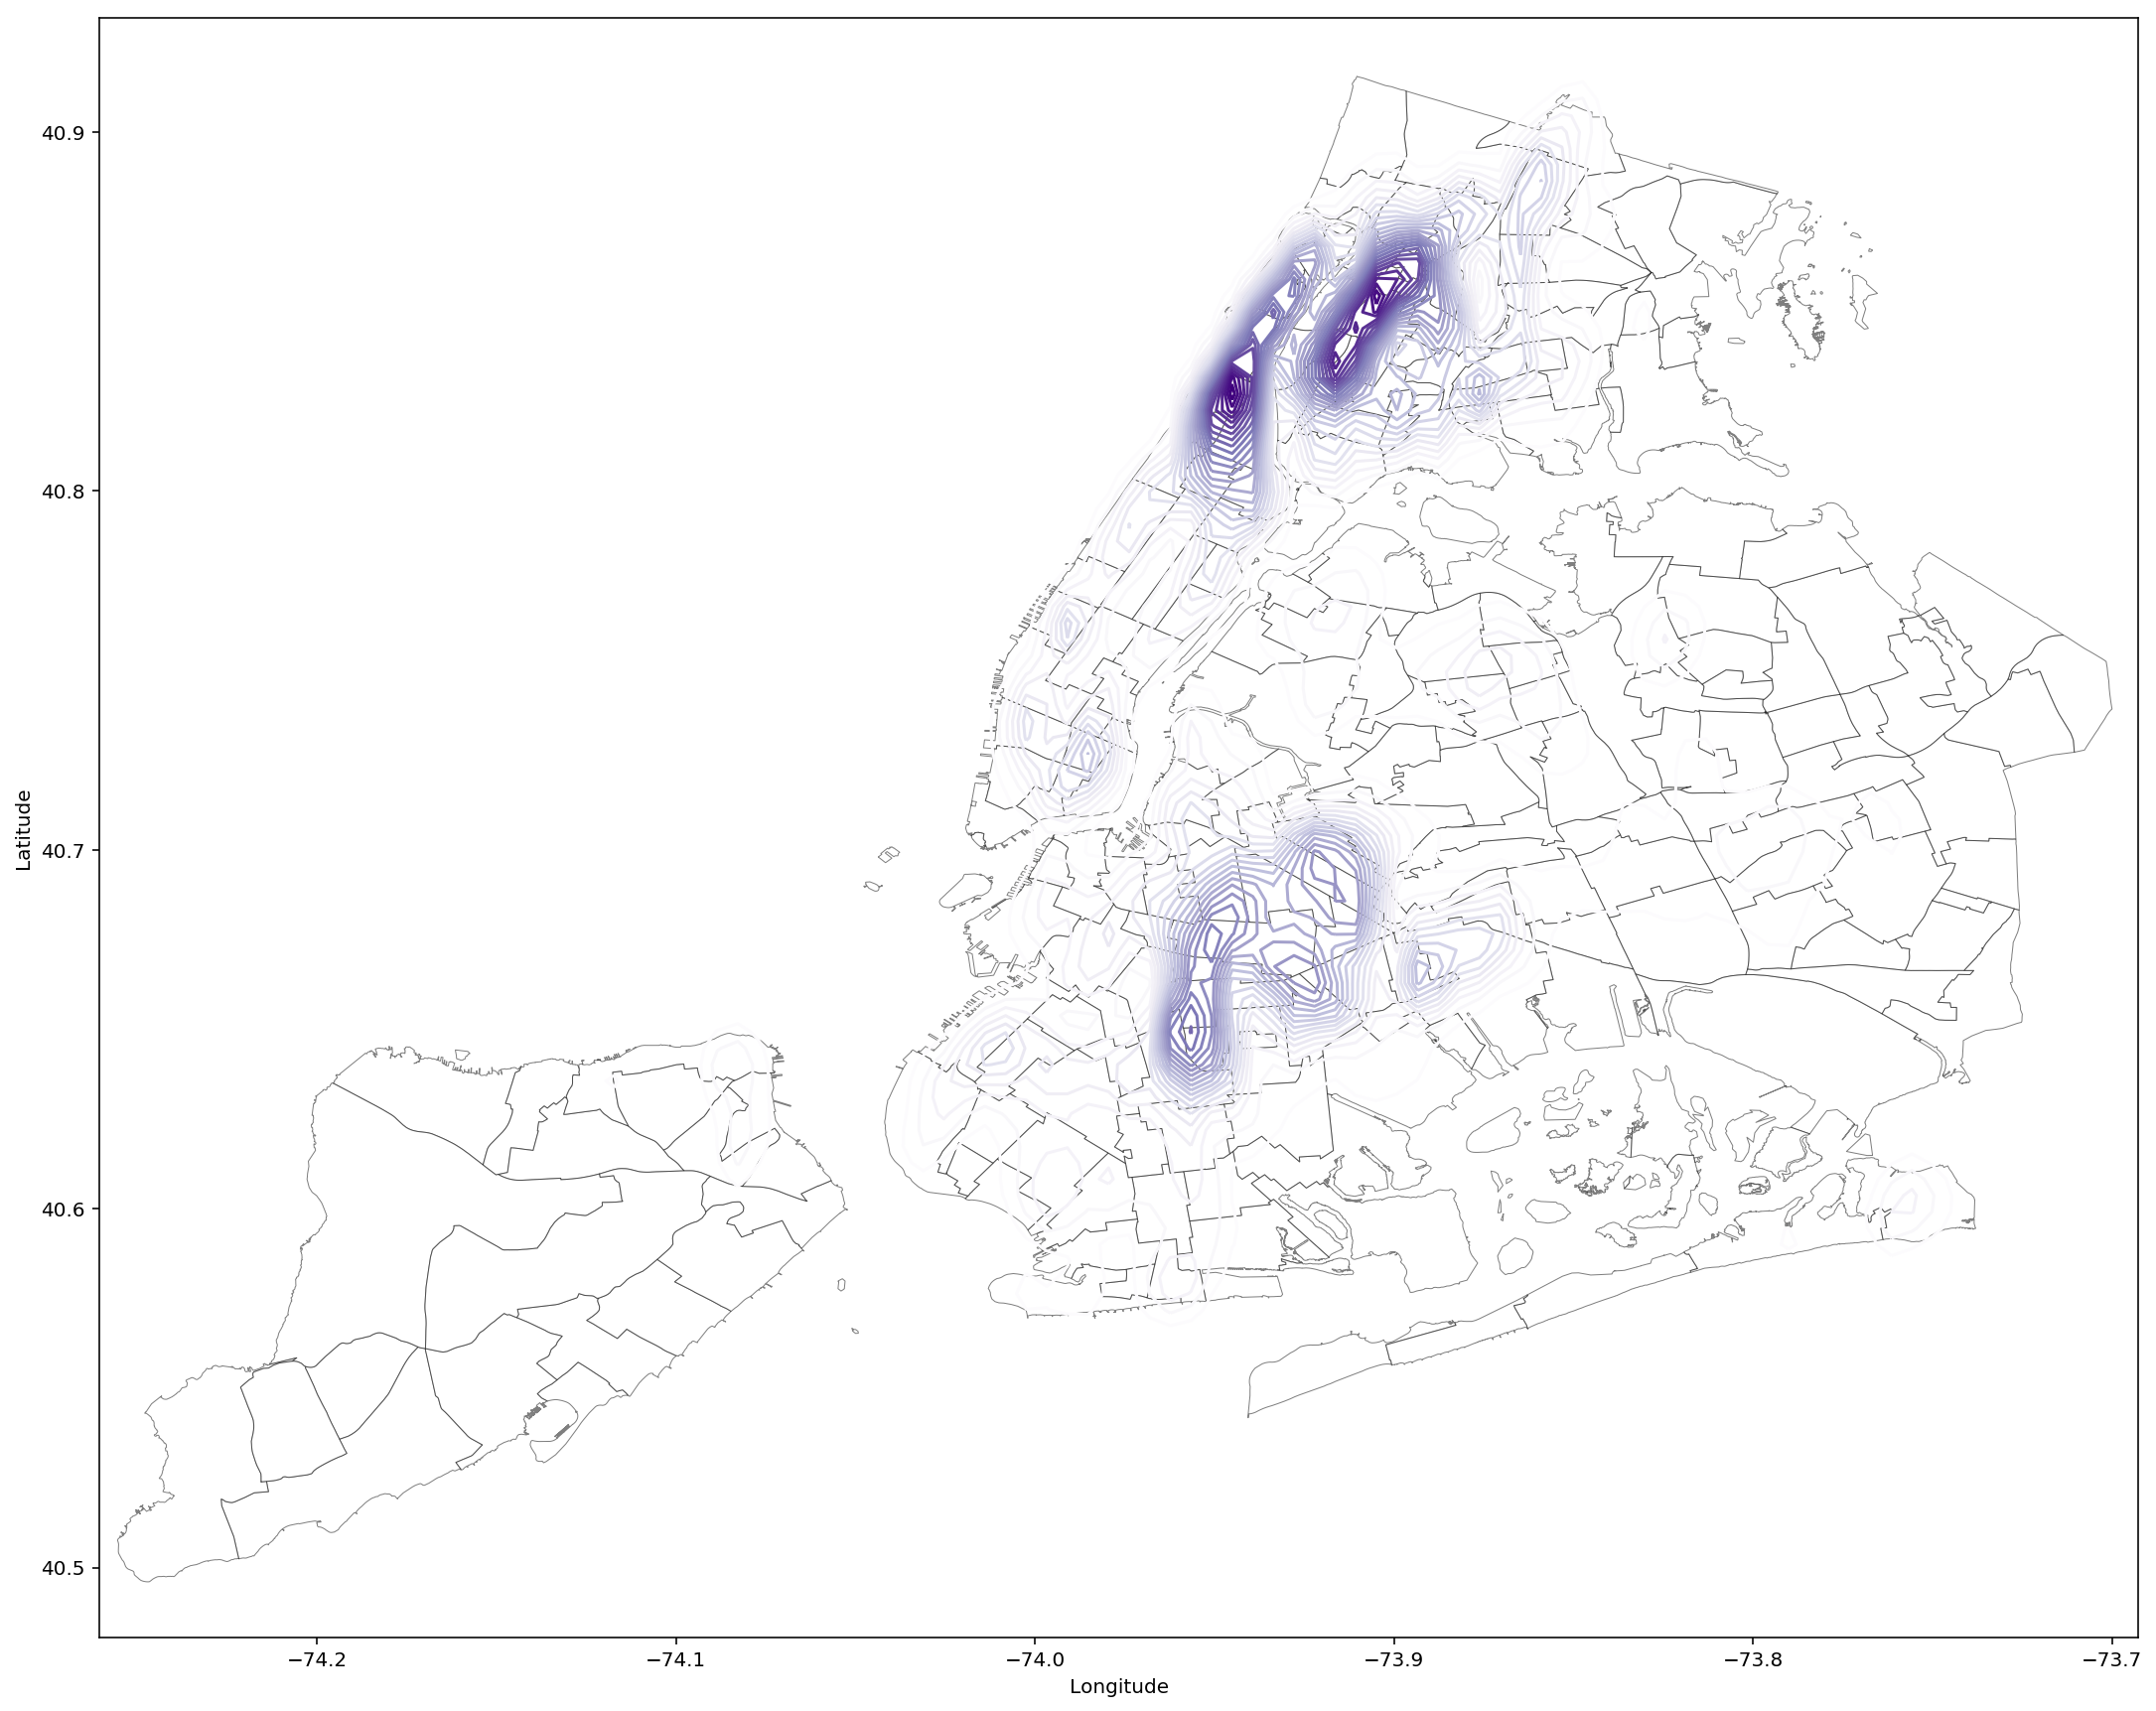

In [23]:
ny_map = df_nyc.plot(linewidth=0.5, color='White',edgecolor = 'Black', figsize = (20,15), alpha=0.5)

sample = housing.sample(frac=0.1)
sns.kdeplot(
    sample.Longitude, sample.Latitude,
    gridsize=100,
    cmap=plt.cm.Purples,
    shade_lowest=False,
    n_levels=30,
    ax=ny_map
)

<B>The following graph represents the time it takes for the department of building to approve a violation depending on the class of the violation. <B>

<I>A</I> class violation is the least severe and the <I>C</I> class is the most severe. *I* class is considered hazardous.

We will disregard Staten Island and the Bronx here because of they have less cases of buildings with housing violations.

In the graph repsented below, <I>A</I> class violations (least severe) take the most time to get approved in Queens, followed by Brooklyn, then Manhattan. The <I>C</I> class violation takes the longest to get approved in Brooklyn, then Queens, then Manhattan. 

In Manhattan, the approval rate is generally much faster than the other boroughs. Queens seems to have the slowest approval rate in all cases except class <I>C</I>, with Brooklyn being the slowest in that case.

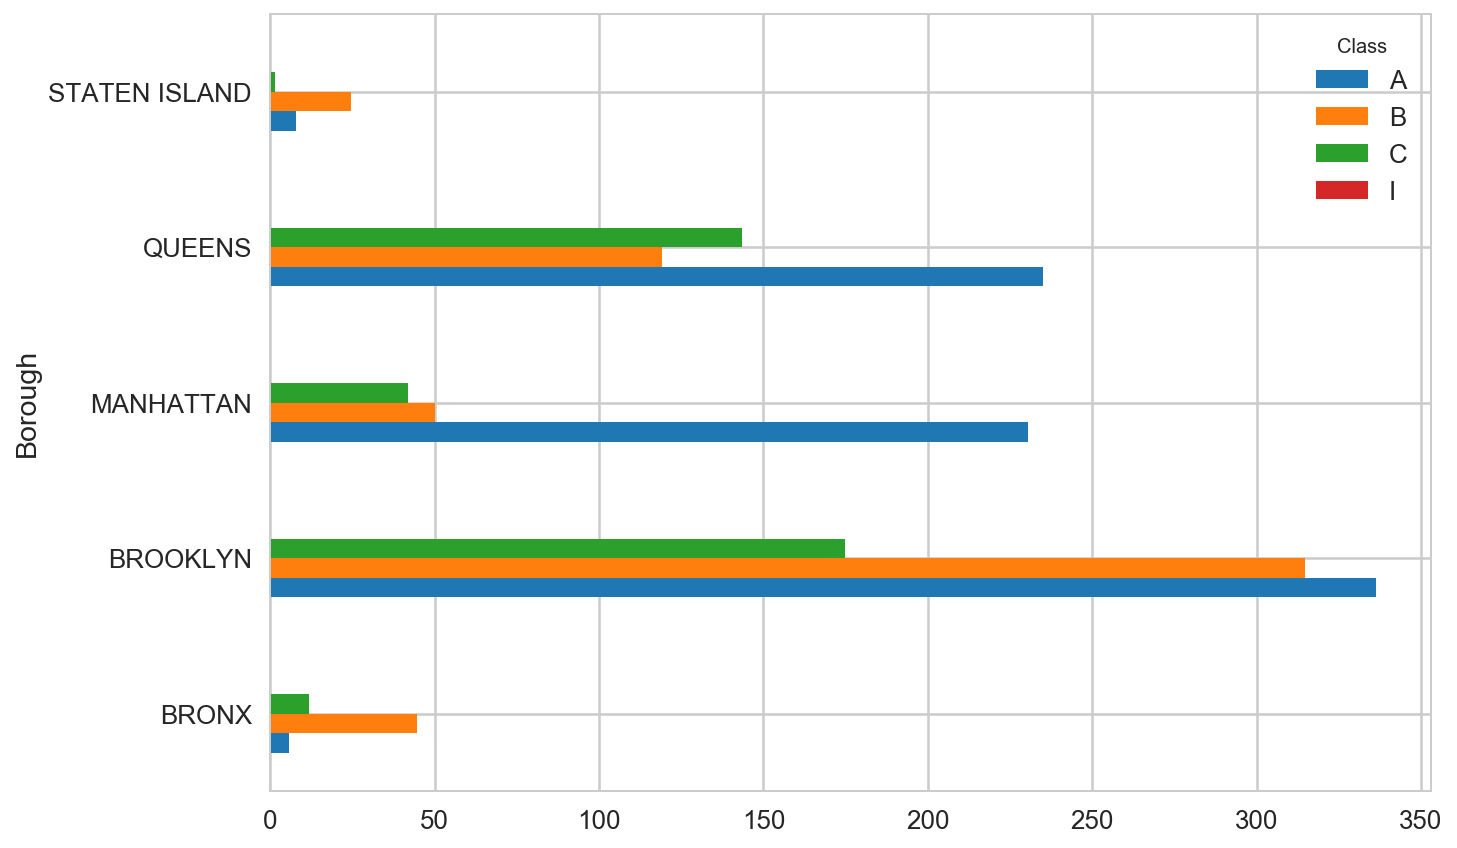

In [28]:
approval = housing[['Time_Until_Approval', 'Class']].set_index("Class")
approval_time= pd.pivot_table(
    data = housing.sample(3000),
    index='Borough',
    columns='Class',
    values='Time_Until_Approval'
).plot.barh()

__There's not a lot of I class (hazardous) violations compared to the other 3 classes, so let's look into that. Clearly from the KDE map and the value_counts, Brooklyn has the greatest number of I class violations. The top 9 streets with at least 1000 hazardous violations are found in Brooklyn's street of __
1. GREENE AVENUE       1642
2. BEDFORD AVENUE      1259
3. PUTNAM AVENUE       1223
4. JEFFERSON AVENUE    1206
5. MADISON STREET      1191
6. HANCOCK STREET      1180
7. 3 AVENUE            1173
8. 5 AVENUE            1140
9. BROADWAY            1041


In [29]:
classI = housing.loc[housing['Class']=="I", ['HouseNumber', 'StreetName', 'Borough', 'Latitude', 'Longitude']]
classI

HouseNumber            StreetName    Borough   Latitude  Longitude
174              20        WEST 11 STREET  MANHATTAN  40.734408 -73.995962
176            2299    SOUTHERN BOULEVARD      BRONX  40.850617 -73.882456
348             238        CENTRAL AVENUE   BROOKLYN  40.697397 -73.923972
366             750          CROWN STREET   BROOKLYN  40.665291 -73.932757
370              67        CENTRAL AVENUE   BROOKLYN  40.701096 -73.930445
626             112        PROSPECT PLACE   BROOKLYN  40.678818 -73.973999
745              64   SOUTH OXFORD STREET   BROOKLYN  40.687886 -73.973775
1026           3546        LACONIA AVENUE      BRONX  40.875212 -73.854971
2577           240A         NASSAU AVENUE   BROOKLYN  40.725843 -73.942018
2578          68-04             79 STREET     QUEENS  40.710964 -73.873432
2639            583       FAIRVIEW AVENUE     QUEENS  40.707516 -73.907188
2687           4684           PARK AVENUE      BRONX  40.858677 -73.892506
2755            935             59 STREET   BROOKLYN  40.634295 -74.005988
2853         159-01    NORTHERN BOULEVARD     QUEENS  40.763155 -73.806291
3416           2413        CROTONA AVENUE      BRONX  40.854480 -73.883353
3433            623       EAST 178 STREET      BRONX  40.846760 -73.892388
3434           1152         HALSEY STREET   BROOKLYN  40.690383 -73.910634
3435         147-07  BROOKVILLE BOULEVARD     QUEENS  40.657170 -73.745014
3436            119         EUCLID AVENUE   BROOKLYN  40.685694 -73.874739
3438          33-36            108 STREET     QUEENS  40.757215 -73.860899
3439         216-22            110 AVENUE     QUEENS  40.708536 -73.741222
3961          50-20            103 STREET     QUEENS  40.742949 -73.859373
4588            218       DIVISION AVENUE   BROOKLYN  40.707279 -73.958792
4831            336          GATES AVENUE   BROOKLYN  40.685928 -73.953054
4832            923        EAST 84 STREET   BROOKLYN  40.636889 -73.909794
4840            330         EAST 5 STREET   BROOKLYN  40.644547 -73.975738
4841            330         EAST 5 STREET   BROOKLYN  40.644547 -73.975738
5135            414        ADELPHI STREET   BROOKLYN  40.685245 -73.970300
5143           240A         NASSAU AVENUE   BROOKLYN  40.725843 -73.942018
5145          60-27             54 STREET     QUEENS  40.714464 -73.912752
...             ...                   ...        ...        ...        ...
4954394        4228              5 AVENUE   BROOKLYN  40.649388 -74.005874
4954395         882              5 AVENUE   BROOKLYN  40.651647 -74.003532
4954396         884              5 AVENUE   BROOKLYN  40.651543 -74.003636
4954397         886              5 AVENUE   BROOKLYN  40.651439 -74.003744
4954398        4001              6 AVENUE   BROOKLYN  40.649290 -74.002368
4954399        4003              6 AVENUE   BROOKLYN  40.649281 -74.002375
4954400        4011              6 AVENUE   BROOKLYN  40.649248 -74.002407
4954401        4113              7 AVENUE   BROOKLYN  40.647349 -74.000793
4954402        4213              7 AVENUE   BROOKLYN  40.646789 -74.001380
4954403        3821              8 AVENUE   BROOKLYN  40.647456 -73.997095
4954404        3914              8 AVENUE   BROOKLYN  40.647138 -73.997456
4954405        4001              8 AVENUE   BROOKLYN  40.646630 -73.997960
4954406        4013              8 AVENUE   BROOKLYN  40.646581 -73.998011
4954407        4014              8 AVENUE   BROOKLYN  40.646583 -73.998036
4954408        4018              8 AVENUE   BROOKLYN  40.646567 -73.998054
4954409        3923              4 AVENUE   BROOKLYN  40.652451 -74.006336
4954410        4307              4 AVENUE   BROOKLYN  40.650277 -74.008602
4954411        4322              4 AVENUE   BROOKLYN  40.650223 -74.008689
4954412         634              4 AVENUE   BROOKLYN  40.664282 -73.994063
4954413         644              4 AVENUE   BROOKLYN  40.664089 -73.994265
4954414         660              4 AVENUE   BROOKLYN  40.663609 -73.994763
4954415         666              

In [30]:
classI['Borough'].value_counts()

BROOKLYN         143570
QUEENS            56914
BRONX             42317
MANHATTAN         39170
STATEN ISLAND      4213
Name: Borough, dtype: int64

In [31]:
classI["StreetName"].value_counts().head(10)

GREENE AVENUE       1642
BEDFORD AVENUE      1259
PUTNAM AVENUE       1223
JEFFERSON AVENUE    1206
MADISON STREET      1191
HANCOCK STREET      1180
3 AVENUE            1173
5 AVENUE            1140
BROADWAY            1041
41 STREET            996
Name: StreetName, dtype: int64

__This is a map of all the I class violations found in NYC__ 

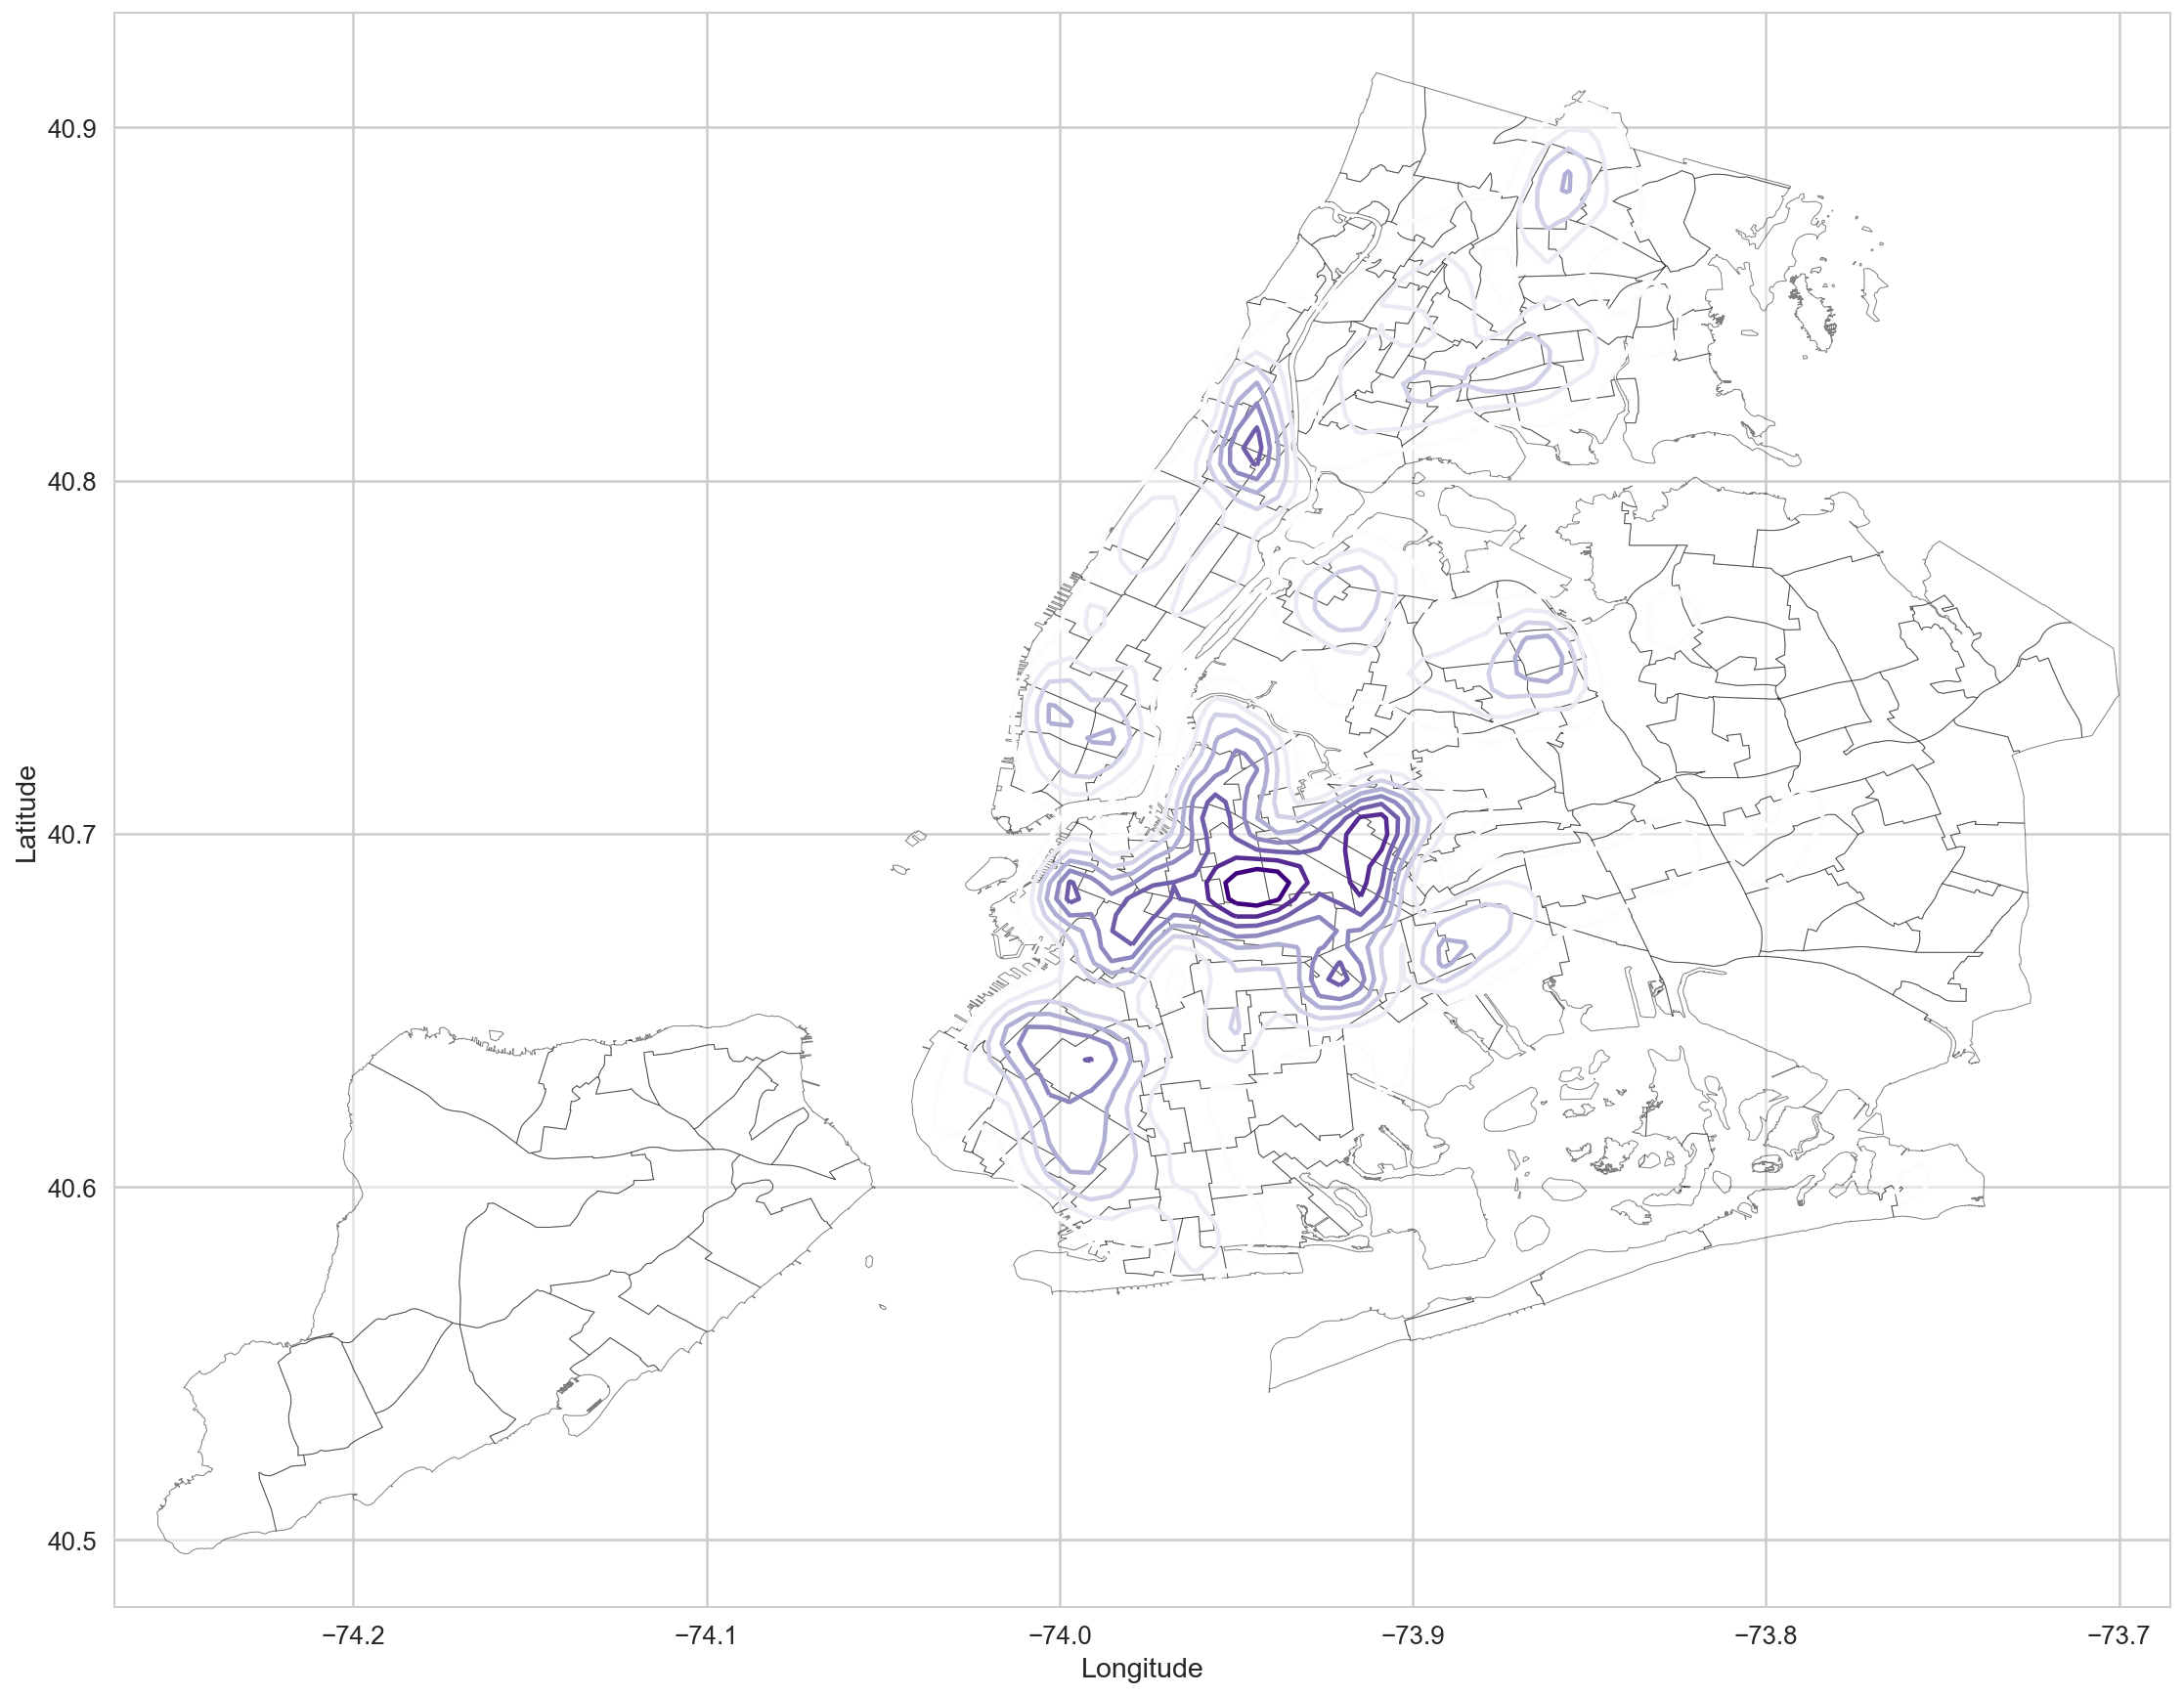

In [32]:
ny_map = df_nyc.plot(linewidth=0.5, color='White', edgecolor = 'Black', figsize = (20,15), alpha=0.5)

sns.kdeplot(
    classI.Longitude, classI.Latitude,
    gridsize=100,
    cmap=plt.cm.Purples,
    shade=False,
    shade_lowest=False,
    n_levels=10,
    ax=ny_map
)